# University of Arizona - Department of Physics

## PHYS 599 - Independent Study (Prof. Eduardo Rozo)

### Sergio Yanez-Pagans

> In this document I review and solve (with help of Jingwei Liu) the exercises proposed in the paper: 
> - Hogg, D.W., Bovy, J. and Lang, D., 2010. Data analysis recipes: Fitting a model to data. arXiv preprint arXiv:1008.4686.
> https://arxiv.org/pdf/1008.4686.pdf
---------------

## 1 Standard practice

<b>Exercise 1:</b> Using the standard linear algebra method of this Section, fit the straight line y = mx + b to the x, y, and σy values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for σx and ρxy. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance σm2 on the slope of the line?

In [1]:
##################################################################
# We import all the possible modules we could need for the problem
##################################################################
from numpy import *
from numpy.linalg import *
import numpy as np
import matplotlib.pyplot as plt
import linecache
import sys
import os 
import random

In [2]:
####################################################################################
# We read the data from a text file using "generate from text" from the numpy module
####################################################################################

#We skip the first 4 lines of the data fot this exercise
ID = np.genfromtxt('hoggs_data.txt',usecols = (0,))[4:]
x_data = np.genfromtxt('hoggs_data.txt',usecols = (1,))[4:]
y_data = np.genfromtxt('hoggs_data.txt',usecols = (2,))[4:]
std_y_data = np.genfromtxt('hoggs_data.txt',usecols = (3,))[4:]
std_x_data = np.genfromtxt('hoggs_data.txt',usecols = (4,))[4:]
rho_xy_data = np.genfromtxt('hoggs_data.txt',usecols = (5,))[4:]

In [3]:
#################################################################################################
# We seek a best linear fit (find the parameters) to  minimize the objective function Chi-Squared
#################################################################################################

#Following the notation of the paper, we create the matrices A, C (Covariance Matrix), X (Parameters Model)
Y = np.array(y_data)[np.newaxis].T
A = np.append(np.ones([len(x_data),1]),np.array(x_data)[np.newaxis].T,1)
C = np.diag((std_y_data)**2)

#The parameters (b, m) and their uncertainties can be calculated as:
cov_matrix = inv(np.linalg.multi_dot([A.T, inv(C), A]))
b, m = np.dot(cov_matrix, np.linalg.multi_dot([A.T, inv(C), Y]))
uncs = np.sqrt(np.diagonal(cov_matrix)) #Uncertainties
b = float(b)
m = float(m)
delta_b = float(uncs[0])
delta_m = float(uncs[1])
print('b =',b, '; m =',m)
print('Δb = ',delta_b, '; Δm =',delta_m)

b = 34.047727757544635 ; m = 2.239920831631082
Δb =  18.246166749268145 ; Δm = 0.10778047654050057


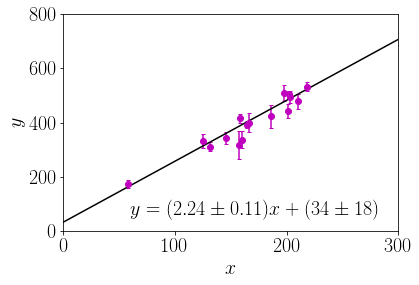

In [4]:
########################################
# We plot the data and the best fit line
########################################
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=20)
plt.rc("errorbar", capsize=2)
domain = np.linspace(0, 300, 100)
model = m*domain + b
plt.errorbar(x_data, y_data, std_y_data, 0, fmt='o', marker='o', c='m')
plt.plot(domain, model, ls='-', c='k')
plt.text(60,60,'$y = (%.2f \pm %.2f) x + (%.0f \pm %.0f)$'%(m,delta_m,b,delta_b))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 800)
plt.show()

<b>Exercise 2:</b> Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance σm2 on the slope of the line? Is there anything you don’t like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

In [5]:
##########################################################################################
# We read the whole data from a text file using "generate from text" from the numpy module
##########################################################################################
ID = np.genfromtxt('hoggs_data.txt',usecols = (0,))
x_data = np.genfromtxt('hoggs_data.txt',usecols = (1,))
y_data = np.genfromtxt('hoggs_data.txt',usecols = (2,))
std_y_data = np.genfromtxt('hoggs_data.txt',usecols = (3,))
std_x_data = np.genfromtxt('hoggs_data.txt',usecols = (4,))
rho_xy_data = np.genfromtxt('hoggs_data.txt',usecols = (5,))

In [6]:
#################################################################################################
# We seek a best linear fit (find the parameters) to  minimize the objective function Chi-Squared
#################################################################################################

#Following the notation of the paper, we create the matrices A, C (Covariance Matrix), X (Parameters Model)
Y = np.array(y_data)[np.newaxis].T
A = np.append(np.ones([len(x_data),1]),np.array(x_data)[np.newaxis].T,1)
C = np.diag((std_y_data)**2)

#The parameters (b, m) and their uncertainties can be calculated as:
cov_matrix = inv(np.linalg.multi_dot([A.T, inv(C), A]))
b, m = np.dot(cov_matrix, np.linalg.multi_dot([A.T, inv(C), Y]))
uncs = np.sqrt(np.diagonal(cov_matrix)) #Uncertainties
b = float(b)
m = float(m)
delta_b = float(uncs[0])
delta_m = float(uncs[1])
print('b =',b, '; m =',m)
print('Δb = ',delta_b, '; Δm =',delta_m)

b = 213.2734919759605 ; m = 1.0767475241683258
Δb =  14.3940331071622 ; Δm = 0.07740678316575603


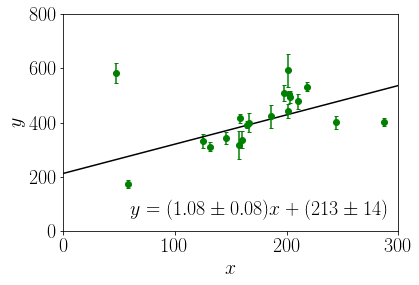

In [7]:
########################################
# We plot the data and the best fit line
########################################
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=20)
plt.rc("errorbar", capsize=2)
domain = np.linspace(0, 300, 100)
model = m*domain + b
plt.errorbar(x_data, y_data, std_y_data, 0, fmt='o', marker='o', c='g')
plt.plot(domain, model, ls='-', c='k')
plt.text(60,60,'$y = (%.2f \pm %.2f) x + (%.0f \pm %.0f)$'%(m,delta_m,b,delta_b))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 800)
plt.show()

<b>Exercise 3:</b> Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix A containing the values x2i , and another element to vector X (call it q). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship: g(x)=qx2 +mx+b .

In [8]:
####################################################################################
# We read the data from a text file using "generate from text" from the numpy module
####################################################################################

#We skip the first 4 lines of the data fot this exercise
ID = np.genfromtxt('hoggs_data.txt',usecols = (0,))[4:]
x_data = np.genfromtxt('hoggs_data.txt',usecols = (1,))[4:]
y_data = np.genfromtxt('hoggs_data.txt',usecols = (2,))[4:]
std_y_data = np.genfromtxt('hoggs_data.txt',usecols = (3,))[4:]
std_x_data = np.genfromtxt('hoggs_data.txt',usecols = (4,))[4:]
rho_xy_data = np.genfromtxt('hoggs_data.txt',usecols = (5,))[4:]

In [9]:
#################################################################################################
# We seek a best cuadratic fit (find the parameters) to  minimize the objective function Chi-Squared
#################################################################################################

#Following the notation of the paper, we create the matrices A, C (Covariance Matrix), X (Parameters Model)
Y = np.array(y_data)[np.newaxis].T
A = np.append(np.append(np.ones([len(x_data),1]),np.array(x_data)[np.newaxis].T,1),np.array(x_data**2)[np.newaxis].T,1)
C = np.diag((std_y_data)**2)

#The parameters (b, m) and their uncertainties can be calculated as:
cov_matrix = inv(np.linalg.multi_dot([A.T, inv(C), A]))
b, m, q = np.dot(cov_matrix, np.linalg.multi_dot([A.T, inv(C), Y]))
uncs = np.sqrt(np.diagonal(cov_matrix)) #Uncertainties
b = float(b)
m = float(m)
q = float(q)
delta_b = float(uncs[0])
delta_m = float(uncs[1])
delta_q = float(uncs[2])
print('b =',b, '; m =',m, '; q =',q)
print('Δb = ',delta_b, '; Δm =',delta_m, '; Δq =',delta_q)

b = 72.89462647167966 ; m = 1.5960504522743122 ; q = 0.0022988884081227567
Δb =  38.91155519455501 ; Δm = 0.5797479125174211 ; Δq = 0.0020338587087390878


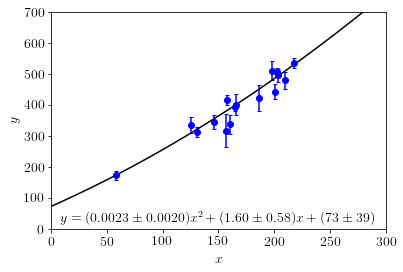

In [10]:
########################################
# We plot the data and the best fit line
########################################
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=14)
plt.rc("errorbar", capsize=2)
domain = np.linspace(0, 300, 100)
model = q*domain**2 + m*domain + b
plt.errorbar(x_data, y_data, std_y_data, 0, fmt='o', marker='o', c='b')
plt.plot(domain, model, ls='-', c='k')
plt.text(8,25,'$y = (%.4f \pm %.4f) x^2 + (%.2f \pm %.2f) x + (%.0f \pm %.0f)$'%(q,delta_q,m,delta_m,b,delta_b))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.show()